In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# 設定資料路徑
data_dir = './dataset_with_detect/train'
val_dir = './dataset_with_detect/val'

# 設定圖像尺寸
img_width, img_height = 28, 28

# 建立訓練和驗證資料產生器
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# 從資料夾載入訓練和驗證資料
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    class_mode='categorical',
    classes=[str(i) for i in range(0, 46)],
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    class_mode='categorical',
    classes=[str(i) for i in range(0, 46)],
    shuffle=False)

Found 2105 images belonging to 46 classes.
Found 484 images belonging to 46 classes.


In [3]:
print(train_generator.class_indices)
print(val_generator.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45}
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45}


In [4]:
# 建立CNN模型
model = models.Sequential([
    layers.Input(shape=(img_width, img_height, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# 輸出層
# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [5]:
callback1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [6]:
history = model.fit(
        train_generator,
        epochs=999,
        validation_data=val_generator,
        callbacks=[callback1])

Epoch 1/999
66/66 [==============================] - 28s 245ms/step - loss: 4.2757 - accuracy: 0.0637 - val_loss: 3.8884 - val_accuracy: 0.0248
Epoch 2/999
66/66 [==============================] - 1s 19ms/step - loss: 2.8738 - accuracy: 0.2385 - val_loss: 4.6871 - val_accuracy: 0.0682
Epoch 3/999
66/66 [==============================] - 1s 20ms/step - loss: 1.9595 - accuracy: 0.4608 - val_loss: 6.5440 - val_accuracy: 0.0434
Epoch 4/999
66/66 [==============================] - 1s 19ms/step - loss: 1.2840 - accuracy: 0.6228 - val_loss: 5.3660 - val_accuracy: 0.1116
Epoch 5/999
66/66 [==============================] - 1s 20ms/step - loss: 0.9004 - accuracy: 0.7178 - val_loss: 3.8412 - val_accuracy: 0.1736
Epoch 6/999
66/66 [==============================] - 1s 20ms/step - loss: 0.6704 - accuracy: 0.7919 - val_loss: 2.1664 - val_accuracy: 0.4256
Epoch 7/999
66/66 [==============================] - 1s 20ms/step - loss: 0.5421 - accuracy: 0.8314 - val_loss: 0.6747 - val_accuracy: 0.7934
Epoc

In [7]:
model.save('./models/cnn_model_9814_with_detect.h5')

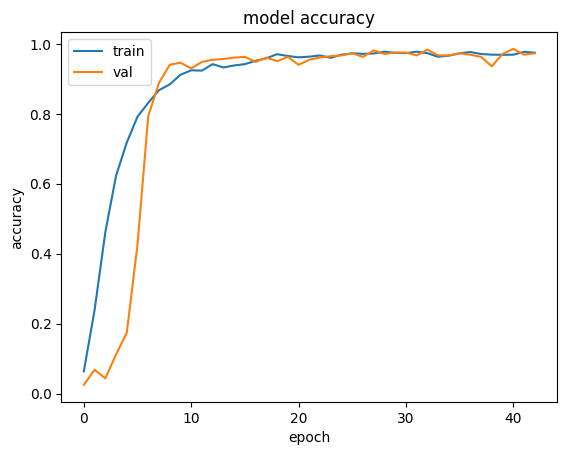

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

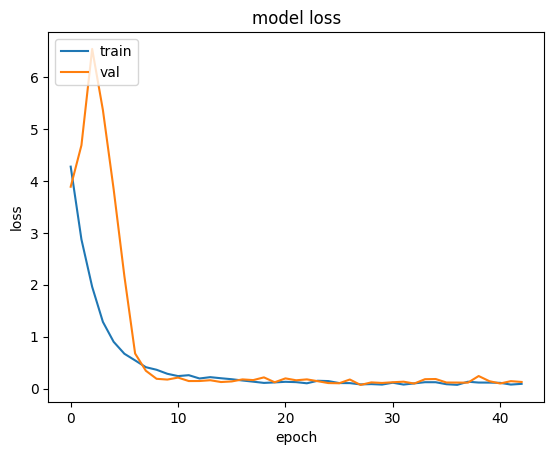

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()